In [292]:
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

In [178]:
sns.set(style="whitegrid", palette="pastel", color_codes=True) 
sns.mpl.rc("figure", figsize=(100,60))

In [721]:
#opening the vector map
shp_path1="gadm36_IND_shp\\gadm36_IND_1.shp"
#reading the shape file by using reader function of the shape lib
sf1 = shp.Reader(shp_path1)

print("Length: ",len(sf1.shapes()))

#sf1.records()

Length:  36


In [283]:
%matplotlib inline

In [284]:
sf.records()[1][4]

'Andhra Pradesh'

In [285]:
def read_shapefile(sf):
    """
    Read a shapefile into a Pandas dataframe with a 'coords' 
    column holding the geometry information. This uses the pyshp
    package
    """
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]
    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)
    return df

In [286]:
df = read_shapefile(sf1)
df.shape

(36, 11)

In [695]:
df

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,state_code,coords
0,IND,India,IND.1_1,Andaman and Nicobar,Andaman & Nicobar Islands|Andaman et Nicobar|I...,,Union Territor,Union Territory,,AN,"[(93.78772736, 6.85264015), (93.7884903, 6.852..."
1,IND,India,IND.2_1,Andhra Pradesh,,,State,State,,AP,"[(80.19264221, 13.52069569), (80.19264221, 13...."
2,IND,India,IND.3_1,Arunachal Pradesh,Agence de la Frontière du Nord-Est(French-obso...,,State,State,,AR,"[(94.21111298, 27.61084175), (94.21350861, 27...."
3,IND,India,IND.4_1,Assam,,,State,State,,AS,"[(89.83874512, 25.96647453), (89.8381424, 25.9..."
4,IND,India,IND.5_1,Bihar,,,State,State,,BR,"[(87.26291656, 27.85071564), (87.25248718, 27...."
5,IND,India,IND.6_1,Chandigarh,,,Union Territor,Union Territory,,CH,"[(76.80293274, 30.6754818), (76.79437256, 30.6..."
6,IND,India,IND.7_1,Chhattisgarh,,,State,State,,CT,"[(80.98058319, 17.93985939), (80.98013306, 17...."
7,IND,India,IND.8_1,Dadra and Nagar Haveli,DAdra et Nagar Haveli|Dadra e Nagar Haveli,,Union Territor,Union Territory,,DN,"[(73.02468109, 20.09630013), (73.01954651, 20...."
8,IND,India,IND.9_1,Daman and Diu,,,Union Territor,Union Territory,,DD,"[(72.88378143, 20.370224), (72.87988281, 20.37..."
9,IND,India,IND.10_1,Goa,Gôa,,State,State,,GA,"[(73.77986145, 15.3554163), (73.77986145, 15.3..."


In [288]:
df.NAME_0.head()

0    India
1    India
2    India
3    India
4    India
Name: NAME_0, dtype: object

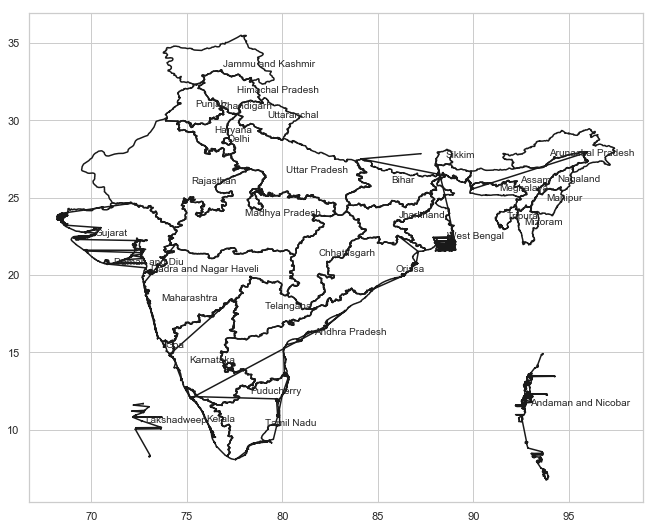

In [327]:
def plot_map(sf, x_lim = None, y_lim = None, figsize = (11,9)):
    '''
    Plot map with lim coordinates
    '''
    plt.figure(figsize = figsize)
    id=0
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'k')
        
        if (x_lim == None) & (y_lim == None):
            x0 = np.mean(x)
            y0 = np.mean(y)
            plt.text(x0, y0, sf.records()[id][4], fontsize=10)
        id = id+1
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)
map_ind = plot_map(sf)
map_ind
plt.savefig("map_india.png", bbox_inches='tight')

In [291]:
city = pd.read_csv('worldcities.csv')
city = city[city.country == 'India']
city.head()

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
3,Mumbai,Mumbai,19.017,72.8570,India,IN,IND,Mahārāshtra,admin,18978000.0,1356226629
5,Delhi,Delhi,28.670,77.2300,India,IN,IND,Delhi,admin,15926000.0,1356872604
7,Kolkata,Kolkata,22.495,88.3247,India,IN,IND,West Bengal,admin,14787000.0,1356060520
34,Chennai,Chennai,13.090,80.2800,India,IN,IND,Tamil Nādu,admin,7163000.0,1356374944
36,Bengalūru,Bengaluru,12.970,77.5600,India,IN,IND,Karnātaka,admin,6787000.0,1356410365


(66.72480316162121, 98.87660675048834, 5.3169019937514665, 36.938685107231144)

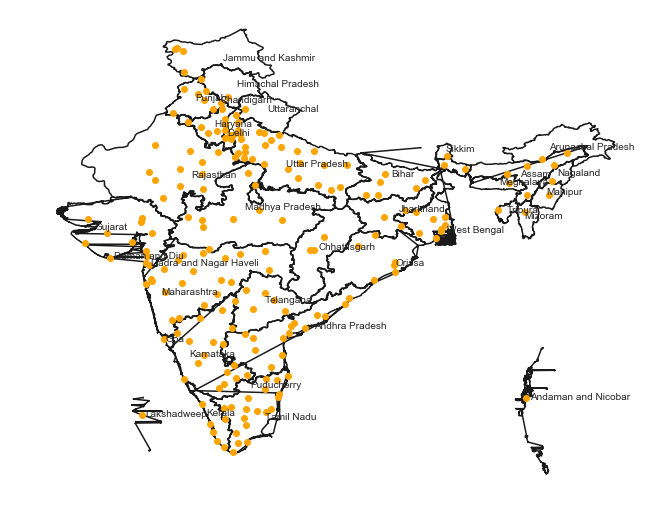

In [316]:
plot_map(sf)

plt.plot(city['lng'],city['lat'],'o', color="orange")
plt.axis('off')
#plt.show()
#plt.savefig("map_india.png", bbox_inches='tight')

In [323]:
case_ts = pd.read_csv("case_time_series.csv")
case_ts.head()


,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,30-Jan,1,1,0,0,0,0
1,31-Jan,0,1,0,0,0,0
2,01-Feb,0,1,0,0,0,0
3,02-Feb,1,2,0,0,0,0
4,03-Feb,1,3,0,0,0,0


In [441]:
case_ts['Daily Confirmed']

0       1
1       0
2       0
3       1
4       1
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
     ... 
35      2
36      1
37      3
38      5
39      9
40     15
41      7
42     12
43      9
44     16
45      6
46     14
47     19
48     25
49     28
50     59
51     76
52     69
53    102
54     66
55     86
56     78
57    151
58    143
59    110
60    208
61    288
62    424
63    486
64    563
Name: Daily Confirmed, Length: 65, dtype: int64

In [445]:
line_chart = alt.Chart(case_ts).mark_line(point=True).encode(
    alt.X(case_ts['Date']),
    y = case_ts['Daily Confirmed'],
    type =
)

line_chart

SyntaxError: invalid syntax (<ipython-input-445-1815cd882f4b>, line 5)

In [401]:
city_name = alt.selection_single(fields=['city_ascii'])
city_name

Selection('selector007', SelectionDef({
  fields: ['city_ascii'],
  type: 'single'
}))

In [409]:
alt.Chart(city).mark_point().encode(
    alt.X('lng',scale=alt.Scale(zero=False)),
    alt.Y('lat',scale=alt.Scale(zero=False)),
    tooltip=['city_ascii']
)


alt.Chart(...)

In [501]:
def calc_color(data, color=None):
        if color   == 1: color_sq =  ['#dadaebFF','#bcbddcF0','#9e9ac8F0','#807dbaF0','#6a51a3F0','#54278fF0'];colors = 'Purples';
        elif color == 2: color_sq =  ['#c7e9b4','#7fcdbb','#41b6c4',
                        '#1d91c0','#225ea8','#253494']; colors = 'YlGnBu';
        elif color == 3: color_sq = ['#f7f7f7','#d9d9d9','#bdbdbd',
                        '#969696','#636363','#252525']; colors = 'Greys';
        elif color == 9: color_sq = ['#ff0000','#ff0000','#ff0000',
                        '#ff0000','#ff0000','#ff0000']
        else:            color_sq = ['#ffffd4','#fee391','#fec44f',
                        '#fe9929','#d95f0e','#993404']; colors = 'YlOrBr';
        new_data, bins = pd.qcut(data, 6, retbins=True,  duplicates='drop',
        labels=list(range(5)))
        color_ton = []
        for val in new_data:
            color_ton.append(color_sq[val]) 
        if color != 9:
            colors = sns.color_palette(colors, n_colors=6)
            sns.palplot(colors, 0.6);
            for i in range(5):
                print ("\n"+str(i+1)+': '+str(int(bins[i]))+
                       " => "+str(int(bins[i+1])-1), end =" ")
            print("\n\n   1   2   3   4   5")    
        return color_ton, bins;

In [ ]:
comuna = state_code
comuna_id=[]
for i in comuna:
    comuna_id.append(df[df['HASC_1'].str[3:] == i].index.get_values())
    #print(comuna_id)
#print(comuna)
for id in comuna_id:
    x = list(state_wise.iloc[id].State)[0]

In [719]:
def plot_comunas_data(sf, title, comunas, data=None, 
                      color=None, print_id=False):
    '''
    Plot map with selected comunes, using specific color
    '''
    
    color_ton, bins = calc_color(data, color)
    #df = read_shapefile(sf)
    comuna_id = []
    for i in comunas:
        #print(i)
        comuna_id.append(df[df.NAME_1 == i].index.get_values())
    plot_map_fill_multiples_ids_tone(sf, title, comuna_id,
                                     print_id, 
                                     color_ton, 
                                     bins, 
                                     x_lim = None, 
                                     y_lim = None, 
                                     figsize = (11,9));

In [717]:
def plot_map_fill_multiples_ids_tone(sf, title, comuna_id,  
                                     print_id, color_ton, 
                                     bins, 
                                     x_lim = None, 
                                     y_lim = None, 
                                     figsize = (11,9)):
    '''
    Plot map with lim coordinates
    '''
        
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    fig.suptitle(title, fontsize=16)

    for shape in sf.shapeRecords():
        for i in range(len(shape.shape.parts)):
            i_start = shape.shape.parts[i]
            if i==len(shape.shape.parts)-1:
                i_end = len(shape.shape.points)
            else:
                i_end = shape.shape.parts[i+1]
            x = [i[0] for i in shape.shape.points[i_start:i_end]]
            y = [i[1] for i in shape.shape.points[i_start:i_end]]
            plt.plot(x, y, 'k')
            
    for id in comuna_id:
        shape_ex = sf.shape(id[0])
        x_lon = np.zeros((len(shape_ex.points),1))
        y_lat = np.zeros((len(shape_ex.points),1))
        for ip in range(len(shape_ex.points)):
            x_lon[ip] = shape_ex.points[ip][0]
            y_lat[ip] = shape_ex.points[ip][1]
        ax.fill(x_lon,y_lat, color_ton[comuna_id.index(id)])
        if print_id != False:
            x0 = np.mean(x_lon)
            y0 = np.mean(y_lat)
            plt.text(x0, y0, id, fontsize=10)
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)
        
    fig.savefig(title);

In [477]:
state_wise = pd.read_csv("state_wise.csv")

In [657]:
df = df.rename(columns={'HASC_1':'state_code'})

In [661]:
df['state_code'] = df['state_code'].str[3:]

In [662]:
df.head()

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,state_code,coords
0,IND,India,IND.1_1,Andaman and Nicobar,Andaman & Nicobar Islands|Andaman et Nicobar|I...,,Union Territor,Union Territory,,AN,"[(93.78772736, 6.85264015), (93.7884903, 6.852..."
1,IND,India,IND.2_1,Andhra Pradesh,,,State,State,,AP,"[(80.19264221, 13.52069569), (80.19264221, 13...."
2,IND,India,IND.3_1,Arunachal Pradesh,Agence de la Frontière du Nord-Est(French-obso...,,State,State,,AR,"[(94.21111298, 27.61084175), (94.21350861, 27...."
3,IND,India,IND.4_1,Assam,,,State,State,,AS,"[(89.83874512, 25.96647453), (89.8381424, 25.9..."
4,IND,India,IND.5_1,Bihar,,,State,State,,BR,"[(87.26291656, 27.85071564), (87.25248718, 27...."


In [706]:
states = df.NAME_1
states

0        Andaman and Nicobar
1             Andhra Pradesh
2          Arunachal Pradesh
3                      Assam
4                      Bihar
5                 Chandigarh
6               Chhattisgarh
7     Dadra and Nagar Haveli
8              Daman and Diu
9                        Goa
10                   Gujarat
11                   Haryana
12          Himachal Pradesh
13         Jammu and Kashmir
14                 Jharkhand
15                 Karnataka
16                    Kerala
17               Lakshadweep
18            Madhya Pradesh
19               Maharashtra
20                   Manipur
21                 Meghalaya
22                   Mizoram
23                  Nagaland
24              NCT of Delhi
25                    Odisha
26                Puducherry
27                    Punjab
28                 Rajasthan
29                    Sikkim
30                Tamil Nadu
31                 Telangana
32                   Tripura
33             Uttar Pradesh
34            

In [483]:
data = list(state_wise.Confirmed)[1:]


1: 0 => 5 
2: 6 => 17 
3: 18 => 57 
4: 58 => 172 
5: 173 => 489 

   1   2   3   4   5


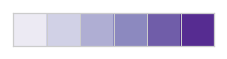

<Figure size 792x648 with 0 Axes>

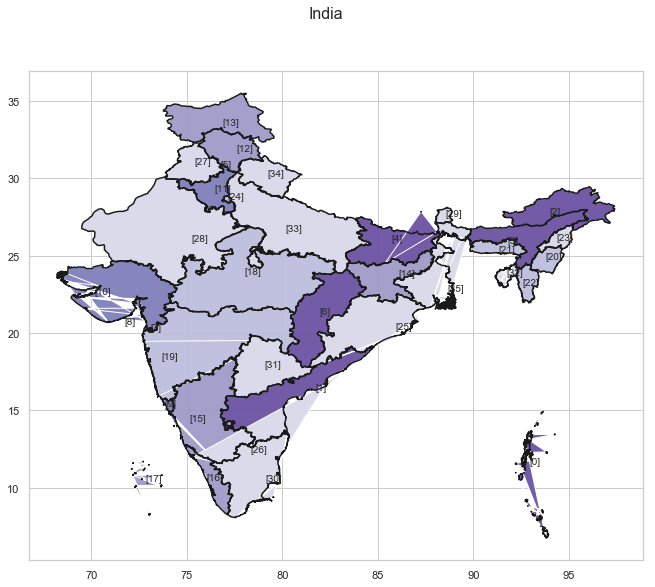

In [720]:
print_id = True # The shape id will be printed
color_pallete = 1 # 'Purples'
plot_comunas_data(sf1, 'India', list(states), data, color_pallete, print_id)